## Exploratory Data Analysis - 2

We will now, use our previous analysis here and some more functions

In [1]:
import nfx_analysis as nfx
# you can access the calls in __init__
# nfx. <tab>

In [2]:
import nfx_analysis.funcs as nff 
# nff. <tab>

In [3]:
# the pandas is internally imported and saved as df in the nfx package
df_from_nfx = nfx.df

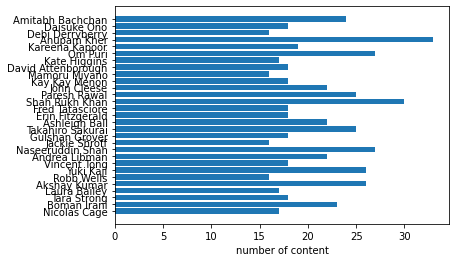

In [4]:
nff.get_lengths(df_from_nfx['cast'], plot=True, threshold=15);

Let's seperate the movies and series and investigate them individually

In [5]:
movies = df_from_nfx[df_from_nfx['type']=='Movie']    ; 
print(f"{len(movies)} movies")
tvseries = df_from_nfx[df_from_nfx['type']=='TV Show'] ; 
print(f"{len(tvseries)} tv series")

4265 movies
1969 tv series


In [8]:
# use the function we already wrote
a = nff.get_lengths(movies['listed_in'], threshold=100)
b = nff.get_lengths(tvseries['listed_in'], threshold=100)

Alternatively we could have imported the function itself and call it without the trailing `nff.` <br>
```python
from nfx_analysis.funcs import get_lengths
a = get_lengths(movies['listed_in'], threshold=100)
```

In [12]:
from nfx_analysis.funcs import plt
# ofcourse this can lead to confusion. It is better to treat this way to the functions that we wrote

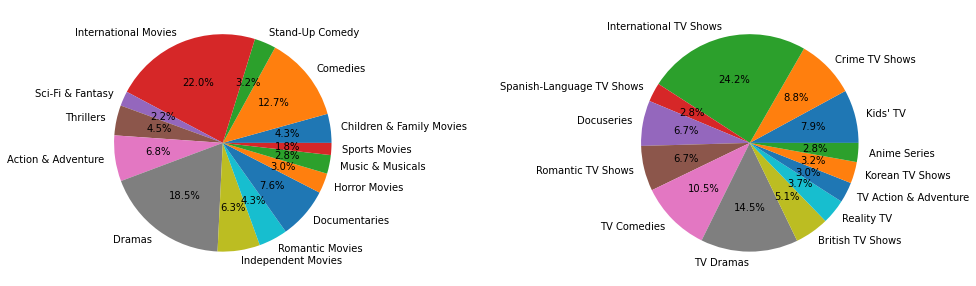

In [13]:
fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.7)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pie(a.values(),labels=a.keys(), autopct="%1.1f%%");
ax2.pie(b.values(),labels=b.keys(), autopct="%1.1f%%");

Let's also look at the movies of a given actor/actress

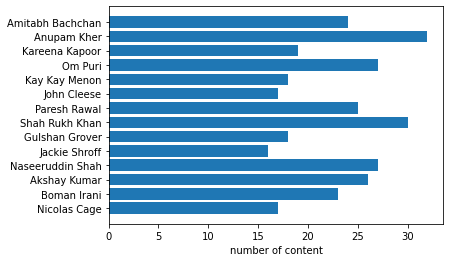

In [15]:
actors_movies = nff.get_lengths(movies['cast'], plot=True, threshold=15)

these might be voice actors for some movies/series. We can check the names of the movies, genres etc. Here I will do the names, and write a function to bring all the dataframe of a given actor

In [18]:
# dropna can take a ```subset``` argument and drops the rows if the value is nan in this column
movies_withcast = movies.dropna(subset=['cast'])

# to call string methods, use .str. method
act = movies_withcast[movies_withcast['cast'].str.contains('Om Puri')]  
print(len(act))
# we are now able to find all the data with the given actor in it
act #['title']

27


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
856,70113306,Movie,Delhi 6,Rakeysh Omprakash Mehra,"Abhishek Bachchan, Sonam Kapoor, Waheeda Rehma...",India,"October 1, 2018",2009,TV-14,128 min,"Dramas, International Movies","In the ancient walled city of Delhi, an Americ..."
879,70101039,Movie,Kismat Konnection,Aziz Mirza,"Shahid Kapoor, Vidya Balan, Juhi Chawla, Om Pu...",India,"October 1, 2018",2008,TV-PG,145 min,"Comedies, International Movies, Music & Musicals",A man finds his lucky charm in the form of a w...
880,70123121,Movie,Kurbaan,Renzil D'Silva,"Kareena Kapoor, Saif Ali Khan, Om Puri, Diya M...",India,"October 1, 2018",2009,TV-MA,147 min,"International Movies, Thrillers",When a young Indian couple moves to the Americ...
1448,80039595,Movie,Chaar Sahibzaade,Harry Baweja,Om Puri,India,"November 1, 2018",2014,TV-PG,126 min,"Dramas, Faith & Spirituality, International Mo...","With a horde of enemy invaders bearing down, f..."
1451,70052249,Movie,Chup Chup Ke,"Priyadarshan, Kookie V. Gulati","Shahid Kapoor, Kareena Kapoor, Om Puri, Neha D...",India,"November 1, 2018",2006,TV-14,158 min,"Comedies, Dramas, International Movies","Mistaking a broke, small-time hustler for a mi..."
1523,80203780,Movie,Waarrior Savitri,Param Gill,"Niharica Raizada, Rajat Barmecha, Lucy Pinder,...",India,"November 1, 2017",2016,TV-14,120 min,"Action & Adventure, International Movies, Sci-...","In a modern adaptation of a mythological tale,..."
1736,70158421,Movie,Action Replayy,Vipul Amrutlal Shah,"Akshay Kumar, Aishwarya Rai Bachchan, Om Puri,...",India,"May 16, 2018",2010,TV-PG,129 min,"Children & Family Movies, Comedies, Internatio...",Vipul Amrutlal Shah directs this sci-fi rom-co...
1908,70258366,Movie,Oh My God,Umesh Shukla,"Akshay Kumar, Paresh Rawal, Mithun Chakraborty...",India,"May 1, 2017",2012,TV-PG,129 min,"Comedies, Dramas, International Movies",Mumbai shopkeeper Kanji Bhai files a lawsuit a...
2355,70012334,Movie,Kyun! Ho Gaya Na,Samir Karnik,"Aishwarya Rai Bachchan, Vivek Oberoi, Amitabh ...",India,"March 1, 2018",2004,TV-PG,165 min,"International Movies, Romantic Movies",Cinematic lovebirds Aishwarya Rai and Vivek Ob...
2364,60032008,Movie,Pitaah,Mahesh Manjrekar,"Sanjay Dutt, Nandita Das, Om Puri, Jackie Shro...",India,"March 1, 2018",2002,TV-MA,127 min,"Dramas, International Movies, Music & Musicals",Thakur Avadh is an evil landlord in a remote v...


As always let's put it in a function to make it re-usable

In [19]:
# construct it such that the same function can also be used for searching data from other columns like look_in='director'
def find_actors_movies(df,actor_name, look_in='cast'):
    """
    Finds the 'title's of the movies/series where
    actor_name plays in it
    Arguments
    --------
    df         : pandas.DataFrame
          the data frame to use
    actor_name : str
          Name of the actor
    look_in    : str
          Where to look for the actor
    
    Returns
    -------
    data frame containing only the movies that the actor is in
    """
    # drop NaN values
    series_filt = df.dropna(subset=[look_in])
    actor_movies = series_filt[series_filt[look_in].str.contains(actor_name)]
    return actor_movies

In [21]:
# now for any movie or series, we can search the data for any given actor/actress
find_actors_movies(movies, 'Jennifer Aniston')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
827,70128696,Movie,The Bounty Hunter,Andy Tennant,"Jennifer Aniston, Gerard Butler, Jason Sudeiki...",United States,"October 1, 2019",2010,PG-13,111 min,"Action & Adventure, Comedies, Romantic Movies",Bounty hunter Milo Boyd finds his latest assig...
2662,80242619,Movie,Murder Mystery,Kyle Newacheck,"Adam Sandler, Jennifer Aniston, Luke Evans, Ge...",United States,"June 14, 2019",2019,PG-13,98 min,Comedies,"On a long-awaited trip to Europe, a New York C..."
2948,70042688,Movie,The Break-Up,Peyton Reed,"Vince Vaughn, Jennifer Aniston, Joey Lauren Ad...",United States,"July 16, 2019",2006,PG-13,107 min,"Comedies, Dramas, Romantic Movies",Cohabitating couple Gary and Brooke's petty sp...
4120,80201490,Movie,Dumplin',Anne Fletcher,"Danielle Macdonald, Jennifer Aniston, Odeya Ru...",United States,"December 7, 2018",2018,PG-13,110 min,"Comedies, Dramas, Independent Movies",To prove a point about measuring up and fittin...
5076,70039168,Movie,Rumor Has It,Rob Reiner,"Jennifer Aniston, Kevin Costner, Shirley MacLa...","United States, Germany, Australia","August 1, 2019",2005,PG-13,97 min,"Comedies, Romantic Movies",When Sarah travels to California for her siste...


In [22]:
find_actors_movies(tvseries, 'Jennifer Aniston')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


We can go back and add this function to our library to use later